In [34]:
import numpy as np
import pandas as pd
import sys
!{sys.executable} -m pip install yfinance
import yfinance as yf

Defaulting to user installation because normal site-packages is not writeable


In [35]:
!pip show yfinance

Name: yfinance
Version: 0.2.36
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: c:\users\keshr\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages
Requires: appdirs, beautifulsoup4, frozendict, html5lib, lxml, multitasking, numpy, pandas, peewee, pytz, requests
Required-by: 


In [36]:
start='2013-10-10'
end='2023-10-10'
stock='GOOG'

data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [37]:
data.reset_index(inplace=True)

In [38]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-10,21.515354,21.639639,21.424944,21.624945,21.624945,90550137
1,2013-10-11,21.569901,21.755455,21.551720,21.718344,21.718344,56567236
2,2013-10-14,21.585592,21.824448,21.553961,21.820959,21.820959,49930453
3,2013-10-15,21.812243,22.058071,21.768408,21.967909,21.967909,63914673
4,2013-10-16,22.064049,22.374386,22.017721,22.366913,22.366913,80604999
...,...,...,...,...,...,...,...
2511,2023-10-03,134.929993,135.240005,132.815002,133.300003,133.300003,19628700
2512,2023-10-04,133.660004,136.570007,133.429993,136.270004,136.270004,22848000
2513,2023-10-05,136.130005,136.500000,134.455002,135.990005,135.990005,15922900
2514,2023-10-06,134.940002,139.186005,134.940002,138.729996,138.729996,20819300


In [39]:
df=pd.DataFrame(data)

In [40]:
print(df.tail())

           Date        Open        High         Low       Close   Adj Close  \
2511 2023-10-03  134.929993  135.240005  132.815002  133.300003  133.300003   
2512 2023-10-04  133.660004  136.570007  133.429993  136.270004  136.270004   
2513 2023-10-05  136.130005  136.500000  134.455002  135.990005  135.990005   
2514 2023-10-06  134.940002  139.186005  134.940002  138.729996  138.729996   
2515 2023-10-09  137.990005  139.970001  136.699997  139.500000  139.500000   

        Volume  
2511  19628700  
2512  22848000  
2513  15922900  
2514  20819300  
2515  16599100  


In [41]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2516,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,2018-10-09 07:03:31.764705792,66.514700,67.226720,65.848981,66.552925,66.552925,3.491253e+07
min,2013-10-10 00:00:00,21.515354,21.639639,21.424944,21.624945,21.624945,1.584340e+05
25%,2016-04-11 18:00:00,36.514124,36.857750,36.235249,36.615375,36.615375,2.333115e+07
50%,2018-10-08 12:00:00,55.625999,56.257376,55.071276,55.700499,55.700499,2.934718e+07
75%,2021-04-09 18:00:00,94.532499,96.097397,93.394876,94.652502,94.652502,3.922837e+07
max,2023-10-09 00:00:00,151.863495,152.100006,149.887497,150.709000,150.709000,4.643901e+08
std,NaN,36.397530,36.853778,35.993337,36.423042,36.423042,2.142279e+07


In [42]:
moving_avg_100days = data.Close.rolling(100).mean() #next day prediction based on 100 days analysis

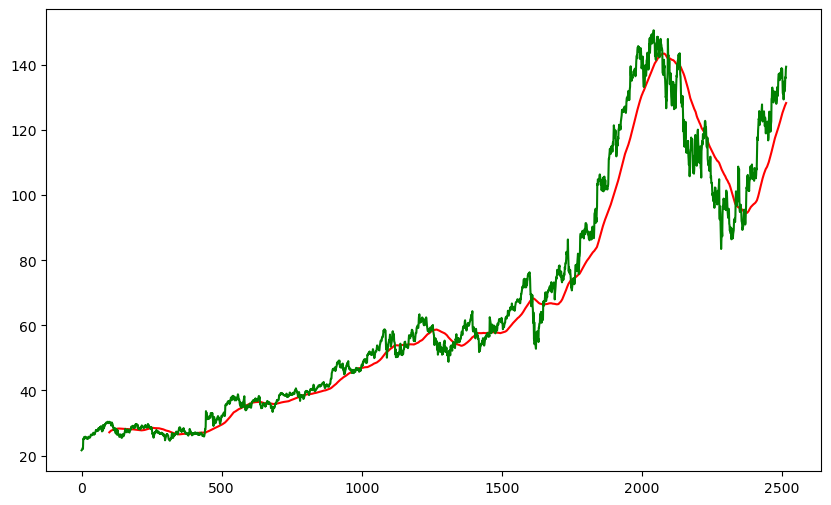

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(moving_avg_100days, 'r')
plt.plot(data.Close,'g')

In [46]:
moving_avg_200days = data.Close.rolling(200).mean() #next day prediction based on 100 days analysis

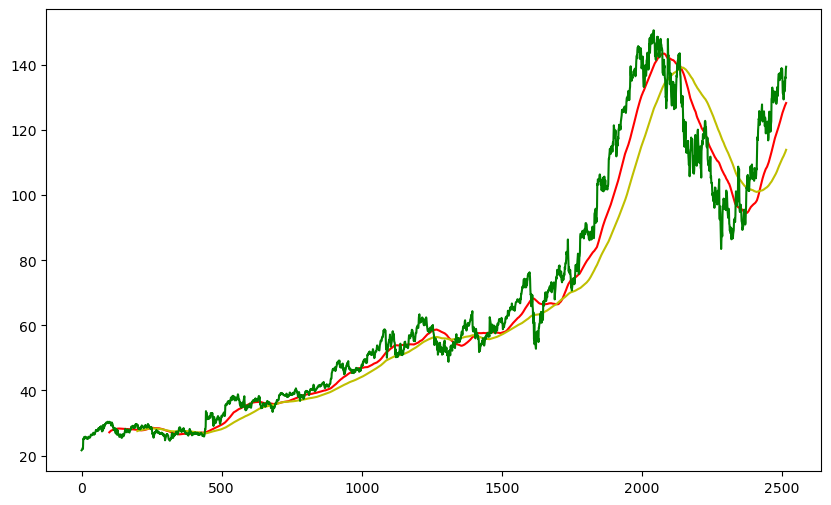

In [47]:
plt.figure(figsize=(10,6))
plt.plot(moving_avg_100days, 'r')
plt.plot(moving_avg_200days, 'y')
plt.plot(data.Close,'g')

In [48]:
#Delete the data with the null values
data.dropna(inplace=True)

In [49]:
train_data = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
test_data=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [50]:
train_data.shape[0]

2012

In [51]:
test_data.shape[0]

504

In [52]:
from sklearn.preprocessing import MinMaxScaler #MinMax scaler used to fit data between 0's and 1's
scaler=MinMaxScaler(feature_range=(0,1))

In [53]:
train_data_scale = scaler.fit_transform(train_data)

In [54]:
x=[]
y=[]
for i in range(100, train_data_scale.shape[0]):
    x.append(train_data_scale[i-100:i])
    y.append(train_data_scale[i,0])

In [55]:
x,y=np.array(x), np.array(y)

In [56]:
import sys
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install keras
from keras import *
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential #Sequential is used to predict the data with the time series

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [64]:
model=Sequential()
#Creating neurons for each and every layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1],1))) # The LSTM layer expects input data in the shape (batch_size, timesteps, features). However, the input data provided x.shape[1,1] during fitting seems to have the shape (batch_size, timesteps, 1).
model.add(Dropout(0.3))
model.add(LSTM(units=60, activation='relu', return_sequences=True)) # return_sequences=True meaning that the output of one layer is the input of another layer
model.add(Dropout(0.4))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.6)) #makes model not too overfitted

model.add(Dense(units=1)) #units=1 since we are predicting just one parameter i.e closing price of the stocks 

In [65]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50

60/60 [==============================] - 22s 226ms/step - loss: 0.0218
Epoch 2/50
60/60 [==============================] - 13s 223ms/step - loss: 0.0055
Epoch 3/50
60/60 [==============================] - 13s 221ms/step - loss: 0.0064
Epoch 4/50
60/60 [==============================] - 14s 227ms/step - loss: 0.0045
Epoch 5/50
60/60 [==============================] - 14s 228ms/step - loss: 0.0048
Epoch 6/50
60/60 [==============================] - 14s 236ms/step - loss: 0.0041
Epoch 7/50
60/60 [==============================] - 14s 241ms/step - loss: 0.0043
Epoch 8/50
60/60 [==============================] - 14s 238ms/step - loss: 0.0036
Epoch 9/50
60/60 [==============================] - 14s 238ms/step - loss: 0.0037
Epoch 10/50
60/60 [==============================] - 14s 240ms/step - loss: 0.0034
Epoch 11/50
60/60 [==============================] - 14s 238ms/step - loss: 0.0034
Epoch 12/50
60/60 [==============================] - 14s 235ms/step - loss: 0.0034
Epoch 13/50


In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [70]:
past_100_days = train_data.tail(100)

In [71]:
#Added 100 rows from train_data to test_data
test_data = pd.concat([past_100_days, test_data], ignore_index=True)

In [99]:
test_data

,Close
0,116.070503
1,115.171501
2,115.435501
3,117.804497
4,117.254997
...,...
599,133.300003
600,136.270004
601,135.990005
602,138.729996


In [100]:
test_data_scale = scaler.fit_transform(test_data)

In [101]:
x=[]
y=[]
for i in range(100, test_data_scale.shape[0]):
    x.append(test_data_scale[i-100:i])
    y.append(test_data_scale[i,0])
x,y = np.array(x), np.array(y)

In [102]:
y_predict = model.predict(x)

16/16 [==============================] - 2s 101ms/step


In [103]:
y_predict

array([[0.7366872 ],
       [0.7318436 ],
       [0.72747827],
       [0.72375244],
       [0.72059655],
       [0.7179397 ],
       [0.7159005 ],
       [0.7146032 ],
       [0.71416986],
       [0.7146872 ],
       [0.71605444],
       [0.71810937],
       [0.7204321 ],
       [0.7226476 ],
       [0.7245624 ],
       [0.72645706],
       [0.7286321 ],
       [0.7313792 ],
       [0.7346128 ],
       [0.7382413 ],
       [0.74220574],
       [0.7465338 ],
       [0.75124717],
       [0.75631124],
       [0.76163006],
       [0.7669324 ],
       [0.7719737 ],
       [0.7767448 ],
       [0.7812756 ],
       [0.7855729 ],
       [0.78963053],
       [0.7935223 ],
       [0.7972705 ],
       [0.80071884],
       [0.80370617],
       [0.80614084],
       [0.80781925],
       [0.8087776 ],
       [0.80898386],
       [0.8083891 ],
       [0.80710036],
       [0.8052296 ],
       [0.80294746],
       [0.8006134 ],
       [0.79858404],
       [0.7970729 ],
       [0.7962008 ],
       [0.795

In [104]:
scale = 1/scaler.scale_

In [105]:
y_predict = y_predict*scale

In [106]:
y*=scale

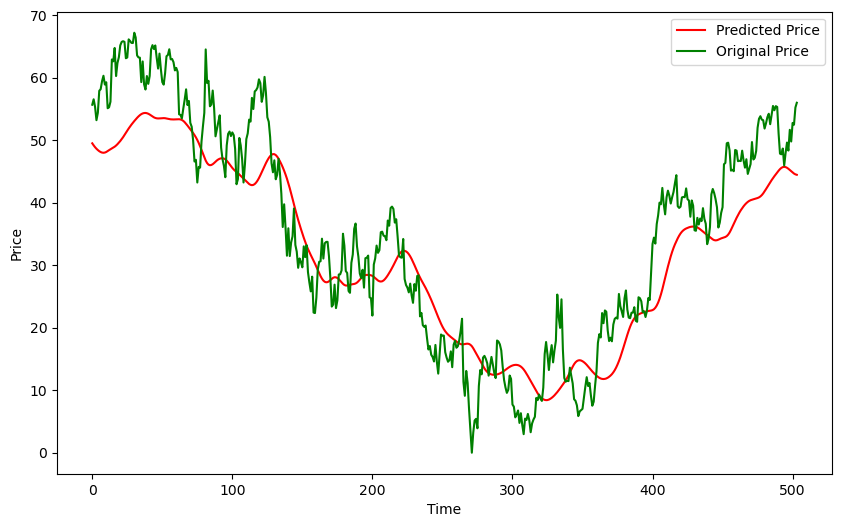

In [107]:
plt.figure(figsize=(10,6))
plt.plot(y_predict,'r', label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [109]:
model.save('Stock Prediction model.keras')